In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
df = pd.read_csv(r'C:\Users\HP\Datasets\credit_risk_dataset.csv')

In [4]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [11]:
df.shape

(28638, 12)

## 2.Identify the Target variable

In [12]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [13]:
Y=df['loan_status']

X= df[['person_age','person_income','person_home_ownership','person_emp_length',
     'loan_intent','loan_grade','loan_amnt','loan_int_rate',
     'loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]

## 3.split into train and test data 

In [14]:
import sklearn

print(sklearn.__version__)

1.1.1


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=125)

In [16]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
23104,29,60000,MORTGAGE,3.0,PERSONAL,A,7200,7.88,0.12,N,7
22117,28,52000,MORTGAGE,0.0,PERSONAL,A,7500,9.32,0.14,N,6
1169,24,60000,RENT,8.0,EDUCATION,A,16800,6.54,0.28,N,2
28200,29,64000,RENT,3.0,DEBTCONSOLIDATION,C,15000,15.27,0.23,N,10
30337,36,51996,MORTGAGE,8.0,MEDICAL,B,7500,10.51,0.14,N,15


In [17]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24942,34,74000,RENT,3.0,EDUCATION,C,11200,11.66,0.15,N,10
30031,45,45000,MORTGAGE,20.0,PERSONAL,A,15625,8.90,0.35,N,13
23397,28,56000,MORTGAGE,5.0,HOMEIMPROVEMENT,C,5050,12.29,0.09,Y,5
771,22,76654,RENT,2.0,EDUCATION,C,20000,13.79,0.26,Y,4
31722,39,126000,MORTGAGE,3.0,MEDICAL,B,14000,9.99,0.11,N,14


In [18]:
print(X_train.shape, Y_train.shape)

print(X_test.shape, Y_test.shape)

(21478, 11) (21478,)
(7160, 11) (7160,)


## seperating Categorical and Numerical column

In [19]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [20]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
23104,MORTGAGE,PERSONAL,A,N
22117,MORTGAGE,PERSONAL,A,N
1169,RENT,EDUCATION,A,N
28200,RENT,DEBTCONSOLIDATION,C,N
30337,MORTGAGE,MEDICAL,B,N


In [21]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
23104,29,60000,3.0,7200,7.88,0.12,7
22117,28,52000,0.0,7500,9.32,0.14,6
1169,24,60000,8.0,16800,6.54,0.28,2
28200,29,64000,3.0,15000,15.27,0.23,10
30337,36,51996,8.0,7500,10.51,0.14,15


In [22]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
23104,29,60000,3.0,7200,7.88,0.12,7
22117,28,52000,0.0,7500,9.32,0.14,6
1169,24,60000,8.0,16800,6.54,0.28,2
28200,29,64000,3.0,15000,15.27,0.23,10
30337,36,51996,8.0,7500,10.51,0.14,15


## Scaling numerical features

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
23104,0.208100,-0.119591,-0.428240,-0.390749,-0.979037,-0.471209,0.304860
22117,0.048700,-0.275503,-1.151447,-0.343387,-0.532653,-0.283769,0.056490
1169,-0.588898,-0.119591,0.777104,1.124852,-1.394421,1.028310,-0.936989
28200,0.208100,-0.041635,-0.428240,0.840677,1.311779,0.559710,1.049969
30337,1.323896,-0.275581,0.777104,-0.343387,-0.163766,-0.283769,2.291818


## Label Encoding on Categorical column

In [24]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)
X_train_cat_le.head()

""
23104
22117
1169
28200
30337


In [25]:
X_train_cat.loan_grade.unique()
X_train_cat.person_home_ownership.unique()
X_train_cat.loan_intent.unique()
X_train_cat.cb_person_default_on_file.unique()

array(['A', 'C', 'B', 'D', 'E', 'F', 'G'], dtype=object)

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

array(['PERSONAL', 'EDUCATION', 'DEBTCONSOLIDATION', 'MEDICAL', 'VENTURE',
       'HOMEIMPROVEMENT'], dtype=object)

array(['N', 'Y'], dtype=object)

In [26]:
loan_encoder = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_encoder[x])

X_train_cat_le.head()

,loan_grade
23104,1
22117,1
1169,1
28200,3
30337,2


## OneHotEncoding to categorical column

In [27]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
23104,MORTGAGE,PERSONAL,A,N
22117,MORTGAGE,PERSONAL,A,N
1169,RENT,EDUCATION,A,N
28200,RENT,DEBTCONSOLIDATION,C,N
30337,MORTGAGE,MEDICAL,B,N


In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
23104,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22117,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1169,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30337,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## concatinating Encoded categorical features and rescaled numerical features

In [29]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe,X_train_cat_le], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_grade
23104,0.208100,-0.119591,-0.428240,-0.390749,-0.979037,-0.471209,0.304860,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
22117,0.048700,-0.275503,-1.151447,-0.343387,-0.532653,-0.283769,0.056490,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1169,-0.588898,-0.119591,0.777104,1.124852,-1.394421,1.028310,-0.936989,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28200,0.208100,-0.041635,-0.428240,0.840677,1.311779,0.559710,1.049969,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
30337,1.323896,-0.275581,0.777104,-0.343387,-0.163766,-0.283769,2.291818,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


## preapring test data

In [30]:
X_test.shape

(7160, 11)

In [31]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24942,34,74000,RENT,3.0,EDUCATION,C,11200,11.66,0.15,N,10
30031,45,45000,MORTGAGE,20.0,PERSONAL,A,15625,8.90,0.35,N,13
23397,28,56000,MORTGAGE,5.0,HOMEIMPROVEMENT,C,5050,12.29,0.09,Y,5
771,22,76654,RENT,2.0,EDUCATION,C,20000,13.79,0.26,Y,4
31722,39,126000,MORTGAGE,3.0,MEDICAL,B,14000,9.99,0.11,N,14


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 24942 to 14053
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7160 non-null   int64  
 1   person_income               7160 non-null   int64  
 2   person_home_ownership       7160 non-null   object 
 3   person_emp_length           7160 non-null   float64
 4   loan_intent                 7160 non-null   object 
 5   loan_grade                  7160 non-null   object 
 6   loan_amnt                   7160 non-null   int64  
 7   loan_int_rate               7160 non-null   float64
 8   loan_percent_income         7160 non-null   float64
 9   cb_person_default_on_file   7160 non-null   object 
 10  cb_person_cred_hist_length  7160 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 671.2+ KB


In [33]:
X_test.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [34]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
24942,RENT,EDUCATION,C,N
30031,MORTGAGE,PERSONAL,A,N
23397,MORTGAGE,HOMEIMPROVEMENT,C,Y
771,RENT,EDUCATION,C,Y
31722,MORTGAGE,MEDICAL,B,N


In [35]:
X_test_cat.index

Int64Index([24942, 30031, 23397,   771, 31722, 11846, 30872, 28239,  7690,
             9635,
            ...
             5782, 32280,   263, 24530, 24219, 13319,  1174, 22230, 24194,
            14053],
           dtype='int64', length=7160)

In [36]:
X_test_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [37]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
24942,34,74000,3.0,11200,11.66,0.15,10
30031,45,45000,20.0,15625,8.90,0.35,13
23397,28,56000,5.0,5050,12.29,0.09,5
771,22,76654,2.0,20000,13.79,0.26,4
31722,39,126000,3.0,14000,9.99,0.11,14


In [38]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
24942,1.005097,0.153256,-0.428240,0.240751,0.192720,-0.190049,1.049969
30031,2.758492,-0.411927,3.669932,0.939349,-0.662848,1.684350,1.795078
23397,0.048700,-0.197547,0.053898,-0.730181,0.388013,-0.752369,-0.191880
771,-0.907697,0.204980,-0.669309,1.630053,0.852996,0.840870,-0.440250
31722,1.802095,1.166688,-0.428240,0.682802,-0.324961,-0.564929,2.043448


In [39]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
24942,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23397,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
771,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31722,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13319,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1174,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22230,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24194,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)
X_test_cat_le.head()

""
24942
30031
23397
771
31722


In [41]:
X_test_cat.loan_grade.unique()

array(['C', 'A', 'B', 'D', 'E', 'F', 'G'], dtype=object)

In [42]:
loan_encoder_ = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : loan_encoder_[x])

X_test_cat_le.head()

,loan_grade
24942,3
30031,1
23397,3
771,3
31722,2


In [43]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le,X_test_cat_ohe], axis=1)

X_test_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
24942,1.005097,0.153256,-0.428240,0.240751,0.192720,-0.190049,1.049969,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30031,2.758492,-0.411927,3.669932,0.939349,-0.662848,1.684350,1.795078,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23397,0.048700,-0.197547,0.053898,-0.730181,0.388013,-0.752369,-0.191880,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
771,-0.907697,0.204980,-0.669309,1.630053,0.852996,0.840870,-0.440250,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31722,1.802095,1.166688,-0.428240,0.682802,-0.324961,-0.564929,2.043448,2,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13319,-0.429499,-0.431416,-0.910378,-1.085400,-1.276626,-1.033529,-0.688620,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1174,-0.907697,-0.145901,0.294967,1.124852,1.776762,0.653430,-0.936989,4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22230,0.367499,-0.236935,0.053898,2.419429,-0.297062,2.715270,0.304860,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24194,0.845698,-0.228730,-0.669309,-0.738075,0.254718,-0.846089,0.801599,2,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [44]:
from sklearn import metrics

In [45]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_transformed, Y_train)

LogisticRegression()

In [46]:
Y_test_pred = reg.predict(X_test_transformed)

In [47]:
temp_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
temp_df.head()

,Actual,Predicted
24942,1,0
30031,0,0
23397,1,0
771,1,0
31722,0,0


In [48]:
metrics.accuracy_score(Y_test,Y_test_pred)

0.7988826815642458

## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()
Knn.fit(X_train_transformed,Y_train)

KNeighborsClassifier()

In [50]:
Y_test_pred = Knn.predict(X_test_transformed)

In [51]:
temp_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
temp_df.head()

,Actual,Predicted
24942,1,0
30031,0,0
23397,1,0
771,1,0
31722,0,0


In [52]:
metrics.accuracy_score(Y_test,Y_test_pred)

0.7958100558659218

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit (X_train_transformed, Y_train )

DecisionTreeClassifier()

In [54]:
Y_test_pred = dtree.predict ( X_test_transformed )

In [55]:
temp_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
temp_df.head()

,Actual,Predicted
24942,1,1
30031,0,1
23397,1,0
771,1,1
31722,0,0


In [56]:
metrics.accuracy_score(Y_test,Y_test_pred)

0.7332402234636871

## Random forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train_transformed,Y_train )

RandomForestClassifier()

In [58]:
Y_test_pred = rfm.predict ( X_test_transformed )

In [59]:
temp_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
temp_df.head()

,Actual,Predicted
24942,1,0
30031,0,0
23397,1,0
771,1,0
31722,0,0


In [60]:
metrics.accuracy_score(Y_test,Y_test_pred)

0.797486033519553

## Support vector Machines

In [61]:
from sklearn.svm import SVC
svm = SVC()
svm.fit( X_train_transformed,Y_train)

SVC()

In [62]:
Y_test_pred = svm.predict ( X_test_transformed )

In [63]:
temp_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
temp_df.head()

,Actual,Predicted
24942,1,0
30031,0,0
23397,1,0
771,1,0
31722,0,0


In [64]:
metrics.accuracy_score(Y_test,Y_test_pred)

0.7924581005586592

In [65]:
lst1= ['Logistic regression','KNN','Decision tree','Random forest classifier','Support vector machines']
lst2= [0.7988826815642458,0.7958100558659218,0.7332402234636871,0.797486033519553,0.7924581005586592]

<Figure size 1200x600 with 0 Axes>

<AxesSubplot:>

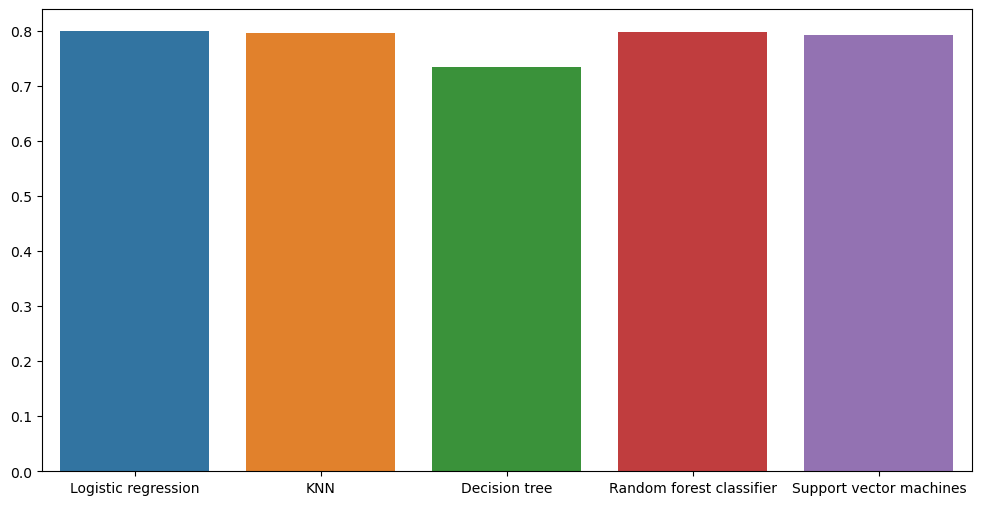

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(lst1,lst2)